<a href="https://colab.research.google.com/github/ndrsbtncr/Aprendizaje_Estadistico/blob/main/Copia_de_TempEnergia_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperatura ambiente y consumo de energía

Tarea 1: Entrenar un modelo de regresión lineal para predecir el consumo de energía de un edificio de retail conocida la temperatura ambiente :cara_de_robot: :persona_tecnóloga: Fecha de entrega: Lunes 19 de Abril.Partiendo del colab en el que hemos estado trabajando regresión lineal:

1) Cree una copia para su modificación. Esta puede ser descargada para ejecutar en su computador o modificarla desde google colab de acuerdo a su preferencia.

2) Utilice toda la información que se encuentra en el conjunto de datos online para los edificios de tipo retail. Es decir, descargue los archivos para los edificios 1 a 5 y a partir de estos cree un solo conjunto de datos (un único dataframe) en su notebook.

3) Realice un análisis exploratorio de los datos similar al hecho en clase. Es posible extenderlo si lo considera necesario.

4) Busque y aplique otra estrategia para la limpieza de datos. Asegúrese de argumentar porqué usó esa estrategia particular y cómo se compara con la usada en clase. Es interesante poder ver visualmente cómo la limpieza de datos afecta el dataset: graficando los puntos removidos en otro color es una buena forma.

5) Realice un primer entrenamiento del modelo y calcule el puntaje (R-cuadrado) de este usando únicamente la información provista en el conjunto de datos. Este modelo servirá como punto de comparación.

6) Aumente el conjunto de datos agregando predictores cuantitativos como también cualitativos. Compare el puntaje del modelo y argumente si la nueva información es valiosa o no para mejorar la predicción.

7) Experimento: :cara_de_nerd: ¿qué pasa si usamos la hora del día como una variable categórica en vez de una variable cuantitativa en nuestro modelo? Observe el comportamiento de la temperatura en función de la hora.

8) Cree un modelo final con los predictores aumentados. ¿Cuál es el puntaje de este modelo comparado con el modelo inicial?

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building1retail.csv
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building2retail.csv
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building3retail.csv
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building4retail.csv
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building5retail.csv

--2021-04-19 04:24:07--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building1retail.csv
Resolving openei.org (openei.org)... 50.17.197.26, 23.21.46.23
Connecting to openei.org (openei.org)|50.17.197.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885170 (864K) [text/csv]
Saving to: ‘building1retail.csv’

building1retail.csv 100%[===================>] 864.42K  3.11MB/s    in 0.3s    

2021-04-19 04:24:09 (3.11 MB/s) - ‘building1retail.csv’ saved [885170/885170]

--2021-04-19 04:24:09--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building2retail.csv
Resolving openei.org (openei.org)... 50.17.197.26, 23.21.46.23
Connecting to openei.org (openei.org)|50.17.197.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885170 (864K) [text/csv]
Saving to: ‘building2retail.csv’



Importamos el dataset1 ([link](/content/building1retail.csv))

Importamos el dataset2 ([link](/content/building2retail.csv))

Importamos el dataset3 ([link](/content/building3retail.csv))

Importamos el dataset4 ([link](/content/building4retail.csv))

Importamos el dataset5 ([link](/content/building5retail.csv))

In [3]:
# Importamos la ruta de los archivos
filename1 =  "/content/building1retail.csv"
filename2 =  "/content/building2retail.csv"
filename3 =  "/content/building3retail.csv"
filename4 =  "/content/building4retail.csv"
filename5 =  "/content/building5retail.csv"

In [4]:
#cambiamos el indice por la fecha con index_col y con parse_dates cambiamos la
#forma en como se escribe la fecha
df1 = pd.read_csv(filename1, index_col=[0], parse_dates=True)
df2 = pd.read_csv(filename2, index_col=[0], parse_dates=True)
df3 = pd.read_csv(filename3, index_col=[0], parse_dates=True)
df4 = pd.read_csv(filename4, index_col=[0], parse_dates=True)
df5 = pd.read_csv(filename5, index_col=[0], parse_dates=True)


In [5]:
data = [df1, df2, df3, df4, df5]
df = pd.concat(data)
df

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,47,285.8
2010-12-30 23:15:00,44,206.6
2010-12-30 23:30:00,44,205.9


# Exploración de datos

In [6]:
#df["Timestamp"][0].year

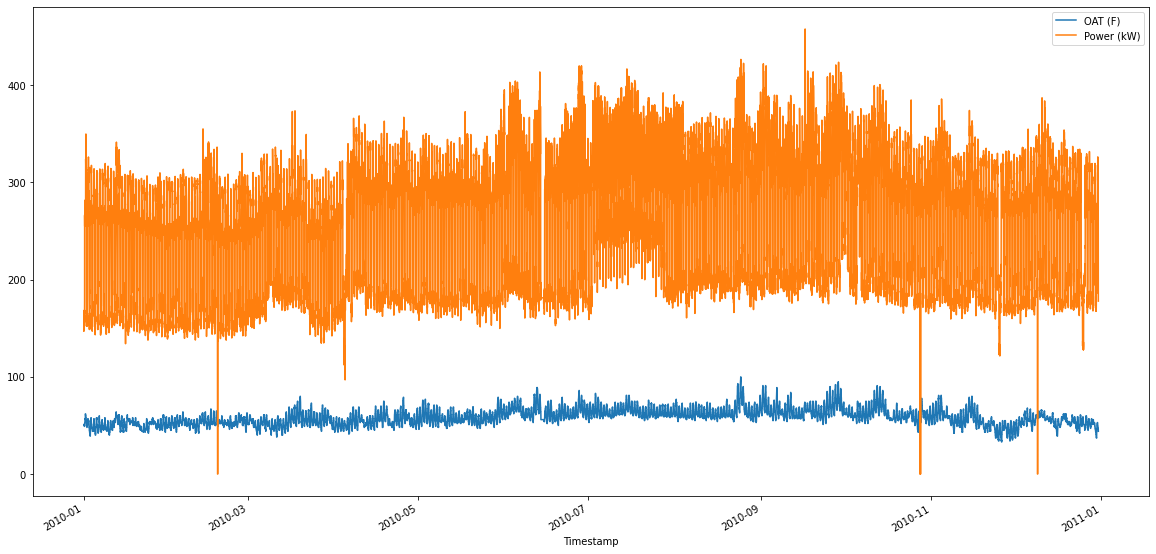

In [7]:
df.plot(figsize=(20,10))

Revisar las propiedades de los datos. Especificamente revisamos si hay valores faltantes.

In [8]:
df.isnull().values.any()

False

por lo tanto concluimos que no hay valores faltantes

¿Cuál es el comportamiento de los datos?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f5bff7d50>,
      dtype=object)

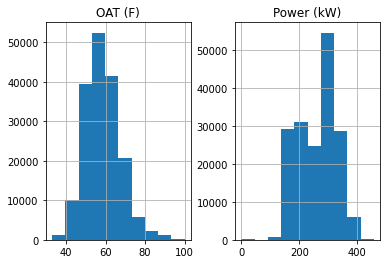

In [9]:
df.hist()

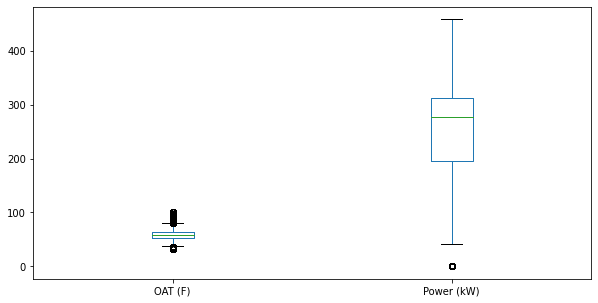

In [10]:
df.plot(kind='box', figsize=(10,5))

Los puntos negros afuera de las barras de $3\sigma$ son outliers

Vamos a limpiar nuestros datos usando la regla de las 3 desviaciones estandar. 

$$
z = \frac{x-\mu}{\sigma}
$$

In [11]:
np.abs(stats.zscore(df)) > 3

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [12]:
std_dev = 3
outliers = (np.abs(stats.zscore(df)) < std_dev).any(axis=1)
df_limpio = df[ outliers  ]

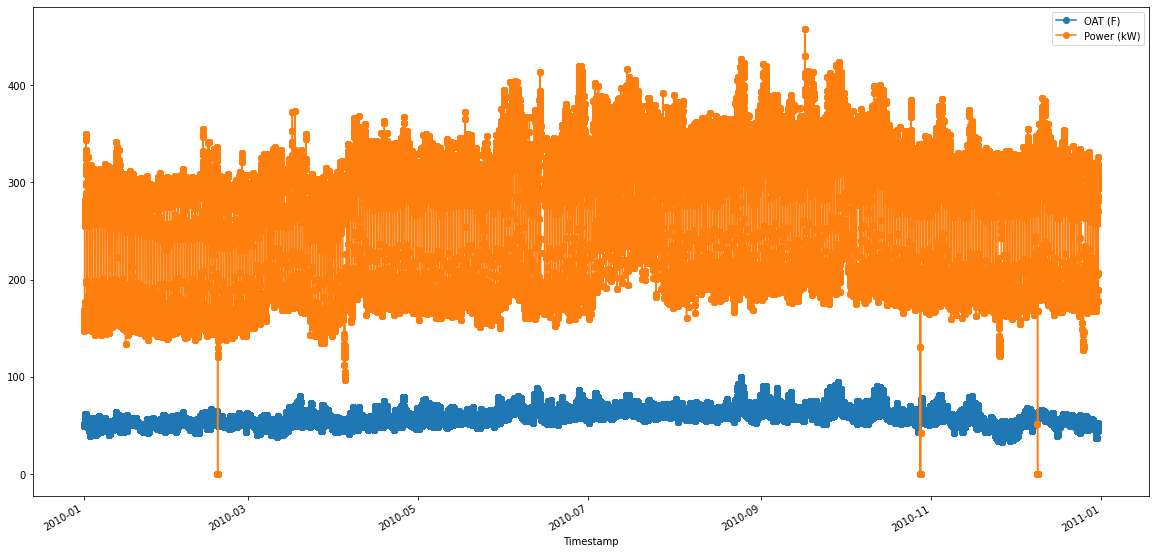

In [13]:
df_limpio.plot(figsize=(20,10),marker='o')

validar la relación entre los datos

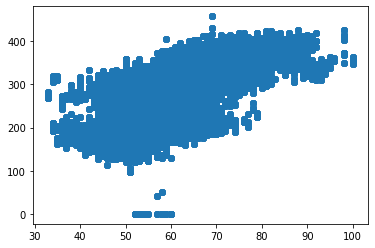

In [14]:
plt.scatter(df_limpio['OAT (F)'], df_limpio['Power (kW)'])

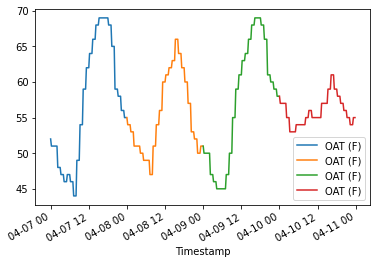

In [15]:
fig, ax = plt.subplots()
df.loc['2010-04-07', ['OAT (F)']].plot(ax=ax)
df.loc['2010-04-08', ['OAT (F)']].plot(ax=ax)
df.loc['2010-04-09', ['OAT (F)']].plot(ax=ax)
df.loc['2010-04-10', ['OAT (F)']].plot(ax=ax)

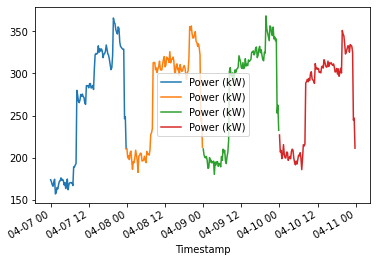

In [16]:
fig, ax = plt.subplots()
df.loc['2010-04-07', ['Power (kW)']].plot(ax=ax)
df.loc['2010-04-08', ['Power (kW)']].plot(ax=ax)
df.loc['2010-04-09', ['Power (kW)']].plot(ax=ax)
df.loc['2010-04-10', ['Power (kW)']].plot(ax=ax)

# Regresión Lineal

In [17]:
X = pd.DataFrame(df['OAT (F)'])
y = pd.DataFrame(df['Power (kW)'])

linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
linear_regression.coef_

array([[4.71286268]])

In [19]:
linear_regression.intercept_

array([-14.46165147])

In [20]:
X.values.flatten().shape

(174700,)

In [21]:
y.values.flatten().shape

(174700,)

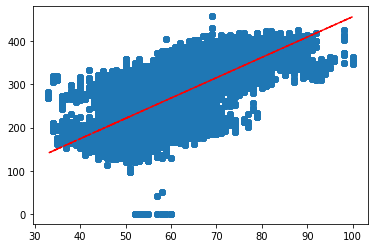

In [22]:
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X.values.flatten()

# dibujar los datos
plt.plot(X.values.flatten(),y.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X.values.flatten(), y_pred, '-.r')

In [23]:
linear_regression.score(X,y)

0.3933227946708479

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
#Random_state semilla

In [25]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
linear_regression.score(X_test,y_test)

0.3942955594991727

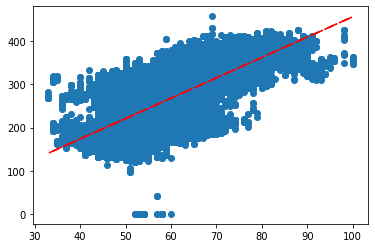

In [27]:
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test.values.flatten()

# dibujar los datos
plt.plot(X_test.values.flatten(),y_test.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_test.values.flatten(), y_pred, '-.r')

## Continuando con regresión lineal
- adición de características
- colinealidad
- características cualitativas
- precisión del modelo

Nos damaos cuenta que para el modelo puede ser valioso conocer "la hora". Agreguemos entonces la hora como predictor a nuestro modelo

In [28]:
df['hour']=df.index.hour

Definimos de nuevo nuestra matriz de datos $X$ y el vector de resultados $y$

In [29]:
X = pd.DataFrame(df[['OAT (F)','hour']])
y = pd.DataFrame(df['Power (kW)'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [31]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
linear_regression.coef_

array([[3.45285327, 5.19584896]])

In [33]:
linear_regression.score(X_test,y_test)

0.6720231421829576

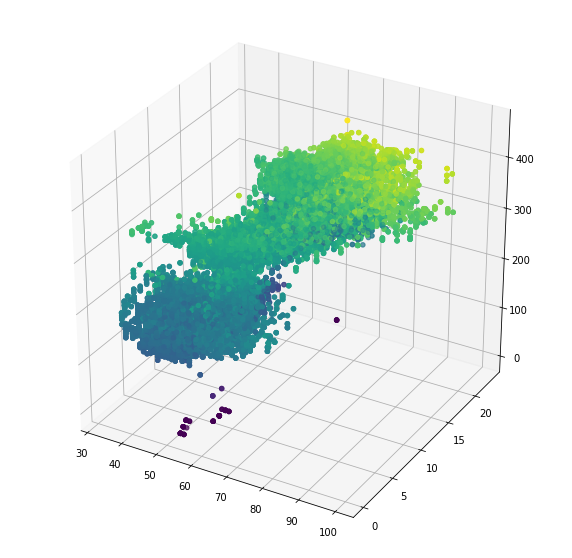

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['OAT (F)'], X_train['hour'], y_train, c=y_train, cmap='viridis')

Colinearidad
$$
y_1 = 3+5x\quad
y_2 = 6 + 10x = 2y_1
$$

In [35]:
df['hour_2']=2*df.index.hour

In [36]:
df

,OAT (F),Power (kW),hour,hour_2
Timestamp,,,,
2010-01-01 01:15:00,51,165.1,1,2
2010-01-01 01:30:00,51,151.6,1,2
2010-01-01 01:45:00,51,146.9,1,2
2010-01-01 02:00:00,51,153.7,2,4
2010-01-01 02:15:00,51,153.8,2,4
...,...,...,...,...
2010-12-30 23:00:00,47,285.8,23,46
2010-12-30 23:15:00,44,206.6,23,46
2010-12-30 23:30:00,44,205.9,23,46


In [37]:
X = pd.DataFrame(df[['OAT (F)','hour', 'hour_2']])
y = pd.DataFrame(df['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.6720219836673421

In [38]:
df = df.drop(columns=['hour_2','hour'])

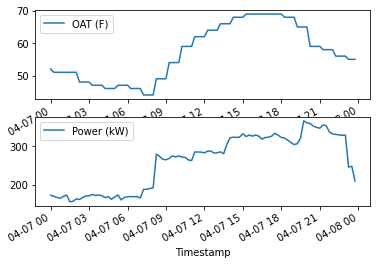

In [39]:
fig, axs = plt.subplots(2)
df.loc['2010-04-07', ['OAT (F)']].plot(ax=axs[0])
df.loc['2010-04-07', ['Power (kW)']].plot(ax=axs[1])

vamos a crear una característica cualitativa relacionada con el estado de encendido del aire acondicionado: se pone a funcionar solo en ciertos horarios

Vamos a asumir que si lel aire acondicionado está funcionando tendrá un valor de 1, de lo contrario será 0

¿Cuál es el horario de funcionamiento? 11h a 23h 

In [40]:
df['open_hours'] = np.where((df.index.hour >= 11) & (df.index.hour <= 23),1,0)

In [41]:
df.sample(10)

,OAT (F),Power (kW),open_hours
Timestamp,,,
2010-11-12 14:30:00,67,278.8,1
2010-07-14 00:30:00,62,261.4,0
2010-04-28 07:00:00,49,174.2,0
2010-11-30 11:00:00,45,270.2,1
2010-07-02 03:30:00,58,179.9,0
2010-04-06 08:00:00,42,212.5,0
2010-02-23 20:30:00,49,288.3,1
2010-05-30 18:00:00,72,308.7,1
2010-02-12 13:15:00,61,262.5,1


In [45]:
X = pd.DataFrame(df[['OAT (F)','open_hours', 'hour']])
y = pd.DataFrame(df['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.6684838456297869

In [43]:
df['month'] = df.index.month

In [44]:
df['hour'] = df.index.hour